## Defining the Project
Employee attrition refers to the gradual reduction in an organization's workforce due to employees leaving for various reasons such as resignation, retirement, termination, or death, without being replaced. This can lead to a decrease in the number of employees over time. Understanding and managing employee attrition is critical for organizations as it impacts productivity, morale, and the overall work environment.

## The Objective of this project
1. Determine the factors that contribute to Employee Attrition
2. Determine the rate of attrition considering employees who left and the average number of employees
3. Identify the impact of employee attrition in the overall productivity and success of the organisation
4. Develop a machine learning model to predict the rate of attrition and give recommendations on how to manage the impact of employee attrition
5. Recommendation
6. Conclusion

## Import library and dependents

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.testing as testing
import os
%matplotlib inline
%reload_ext autoreload
%autoreload 2

## Load the dataset
We will load our dataset into our code file using the pandas library

In [40]:
Attrition_df = pd.read_csv("HR-Employee-Attrition.csv")

## Confirm the dataset
Lets confirm the successful loading of our dataset into our code file by printing out our dataframe

In [193]:
Attrition_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


## Confirm the columns
From these code  we understand that we have 35 columns, which are both dependent and independent variable. We also understand that we have both descret and continous variables with the dataframe 

In [195]:
Attrition_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## Set Column length
We would like to view the whole length of column within the dataframe, this will help us analyse and try to understand the dataframe

In [197]:
pd.set_option('display.max_columns',100)

In [198]:
#set options for row and column length
Attrition_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# Explorative Data Analysis
## Confirm accuracy of datatype
We have two data types within our dataframe, we have int64 which is an integer data type and we have the object which is a string data type, from the list of columns below we understand that our datatype are normalized

In [200]:
#check for data type
Attrition_df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

## Check for duplicated values

In [202]:
# There are no duplicates within the dataframe
Attrition_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

## Confirm data shape

In [204]:
# We have 1470 rows and 35 columns
Attrition_df.shape

(1470, 35)

## Check for null values
We do not have any null values within our dataframe, this means that all the rows are filled with either a numeric value of a string value datatype

In [206]:
# we do not have any null values 
Attrition_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Checking & Reviewing DataFrame information
1. Reviewing the dataframe information below, we can see that the avarage age of employees leaving the company is between the age of 30 and 50
2. Most of these employees travel rarely, which means their work life is not balanced
3. Based on our dataset they can come from any department and they can be of any gender or civil status


In [208]:
Attrition_df.info

<bound method DataFrame.info of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Education

## Set Index as Employee Number
lets set a unique variable for our index column, and we will be using the employee number, since two employees can not have the same unique number

In [210]:
# lets set a unique variable for our index column
Attrition_df.set_index('EmployeeNumber', inplace = True)

In [211]:
#confirm change of index from system generated to custom generated
Attrition_df.head(4)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0


## List of impact of employee attrition in the overall productivity and success of the organisation
Employee attrition can have various impacts on the overall productivity and success of an organization. Here is a list of potential impacts:

- Direct Financial Costs
- Productivity Impacts
- Quality Impacts
- Morale and Engagement
- Knowledge and Innovation
- Customer Satisfaction
- Company Reputation
- Strategic Impacts
- Financial Performance
- Legal and Compliance


## We need to identify the factors that contribute to Employee Attrition

In [306]:
# Convert categorical columns to appropriate types
Attrition_df['Attrition'] = Attrition_df['Attrition'].astype('category')
Attrition_df['Gender'] = Attrition_df['Gender'].astype('category')
Attrition_df['Department'] = Attrition_df['Department'].astype('category')

## Identifying factors that caused Employee Attrition

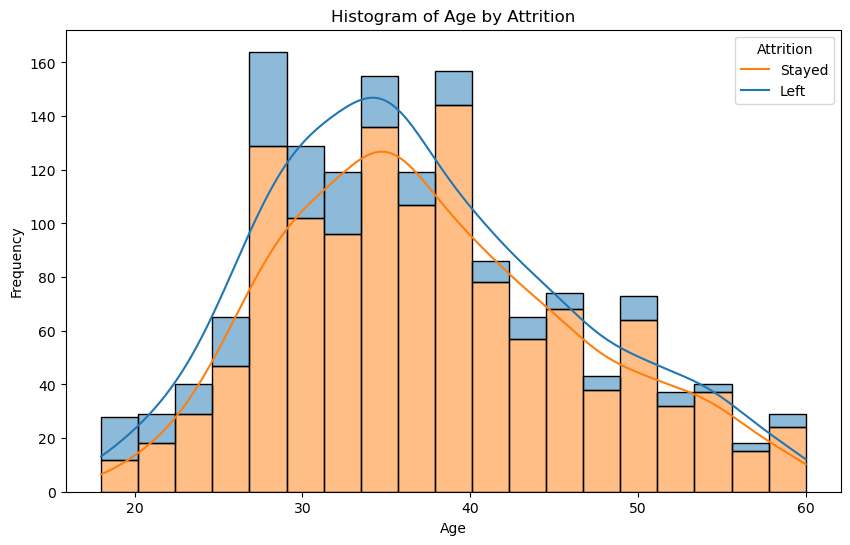

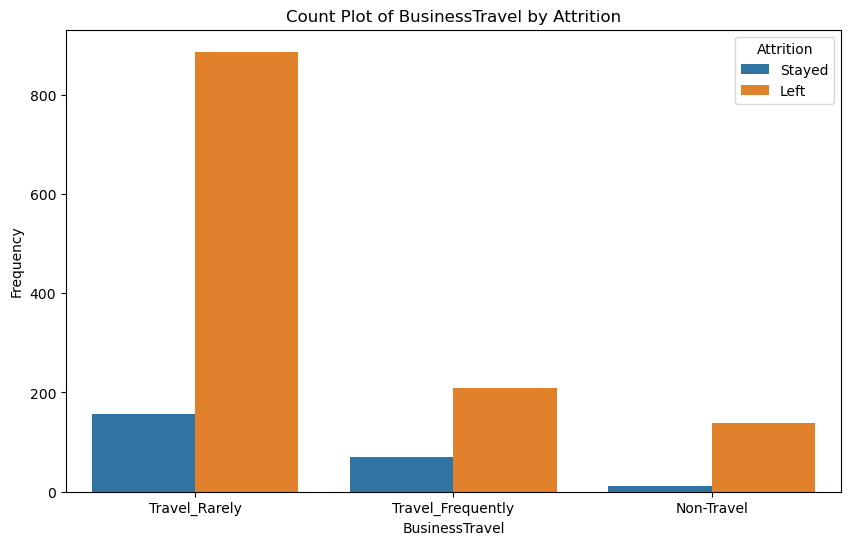

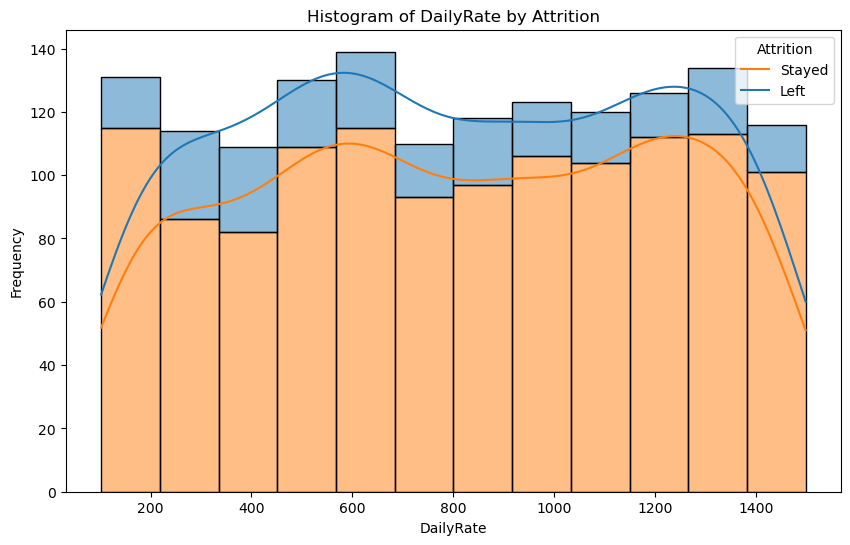

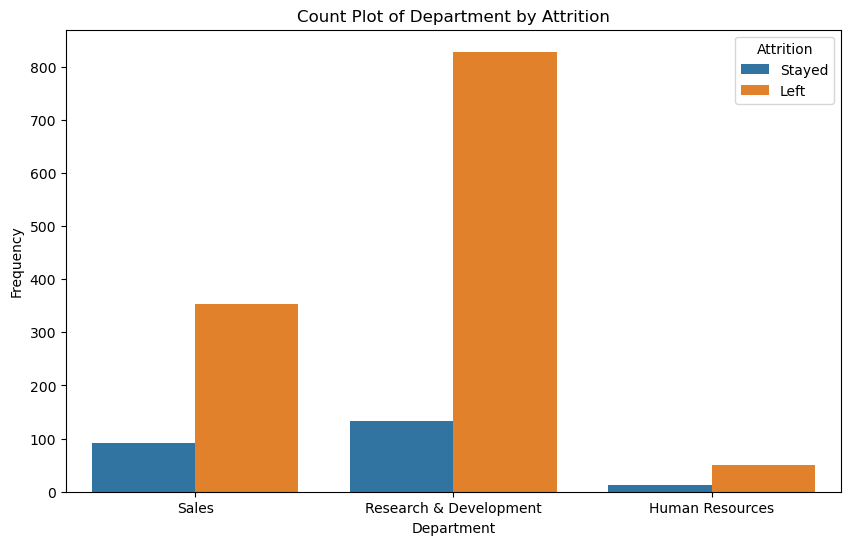

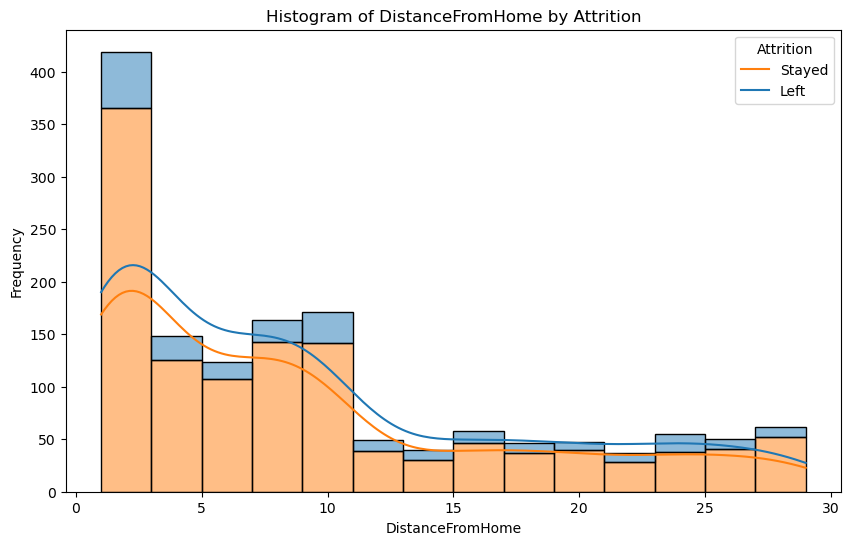

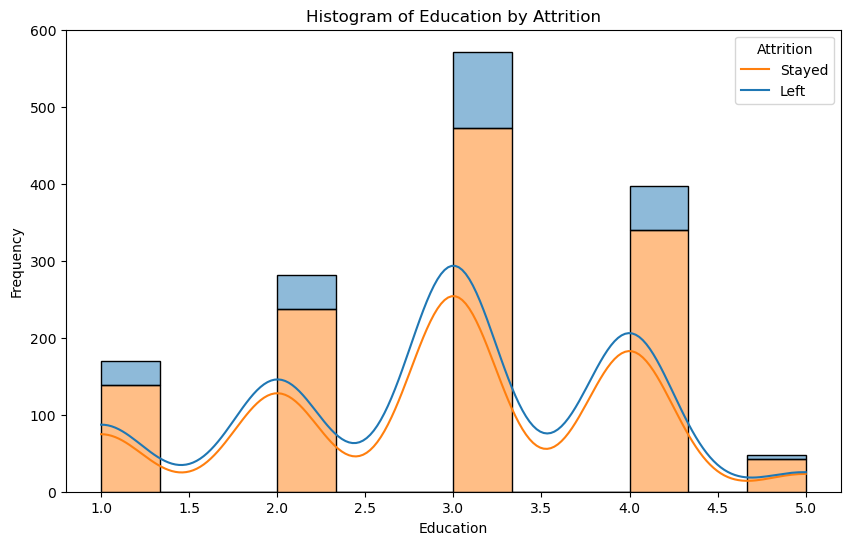

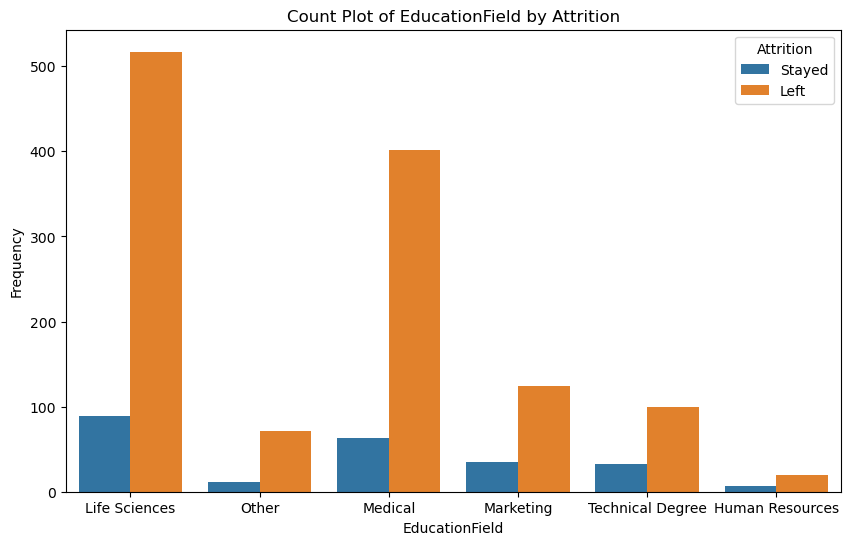

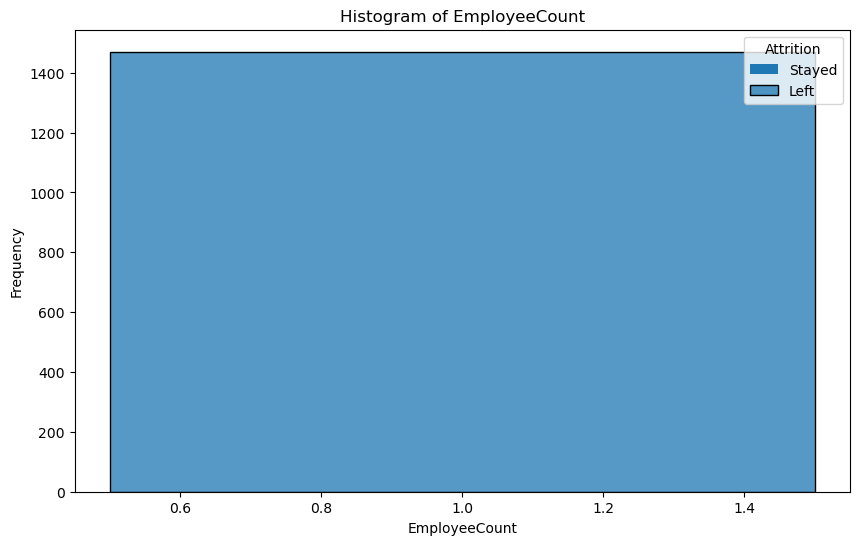

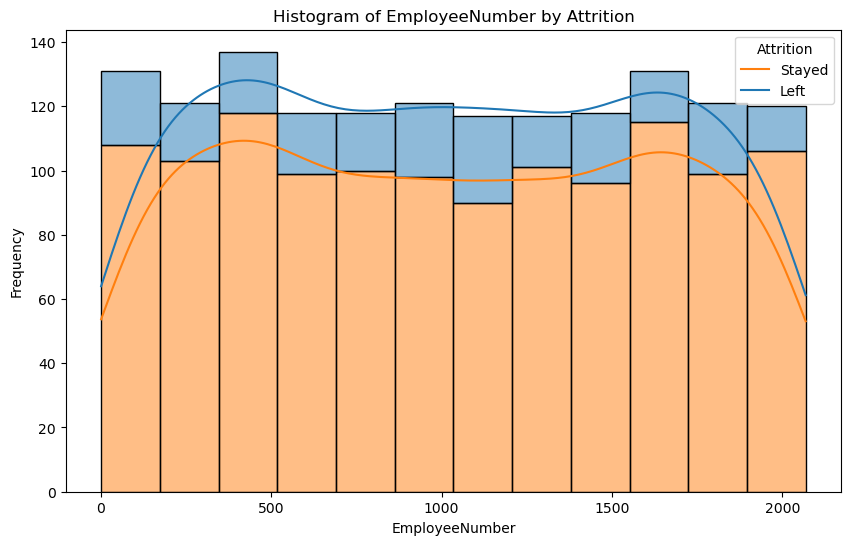

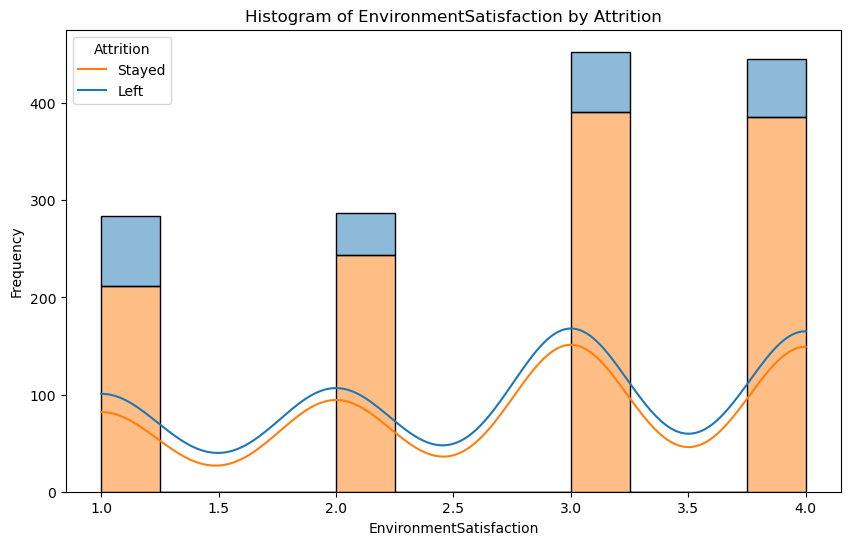

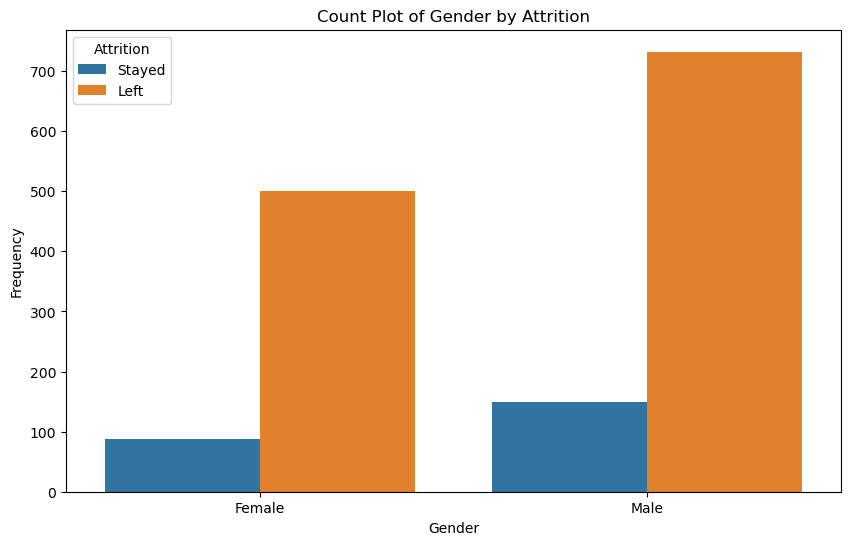

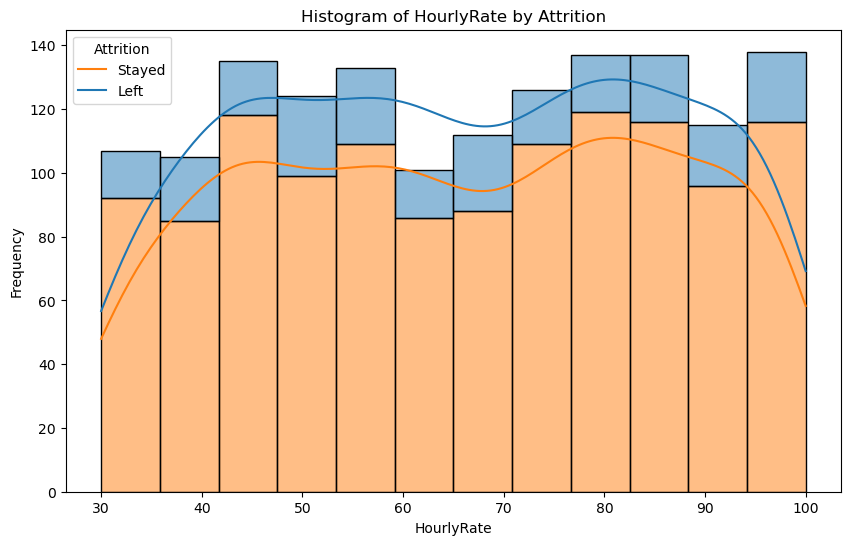

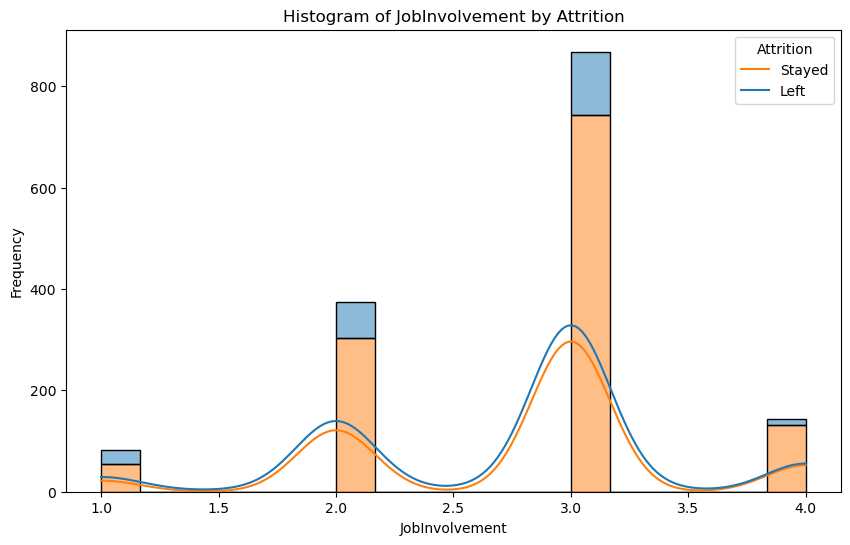

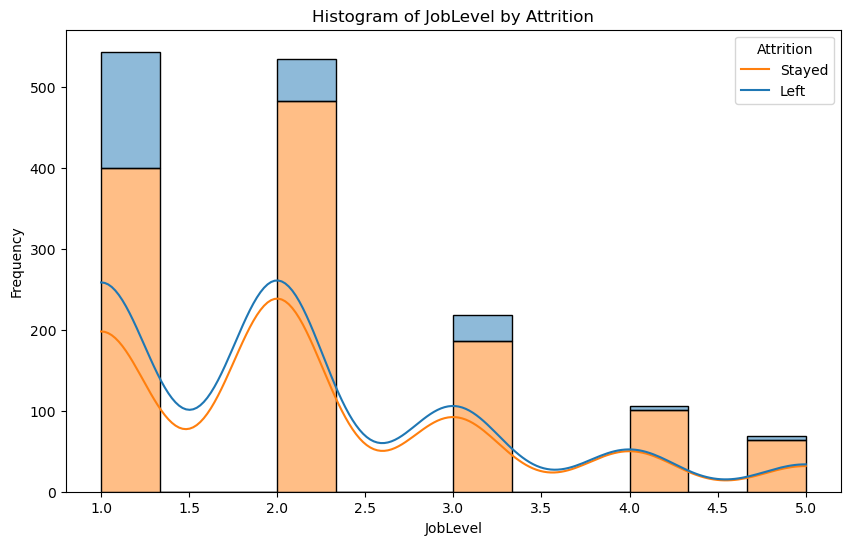

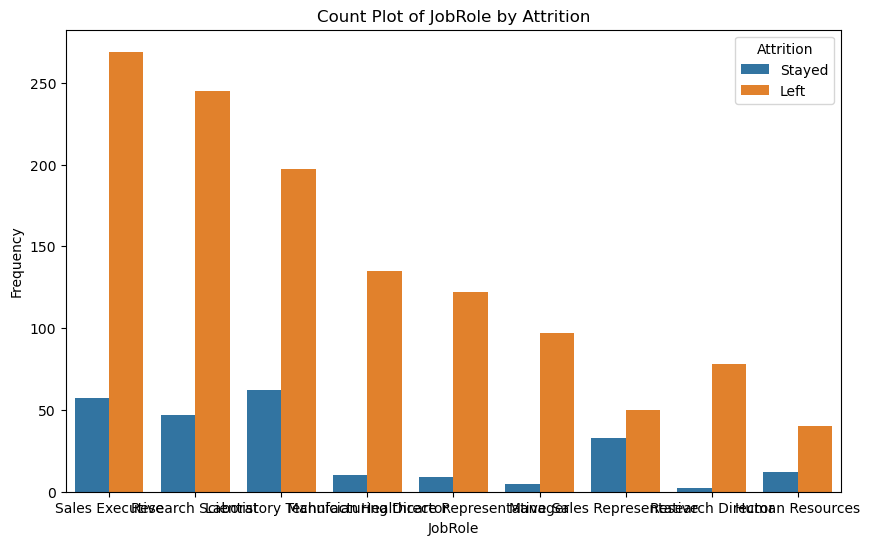

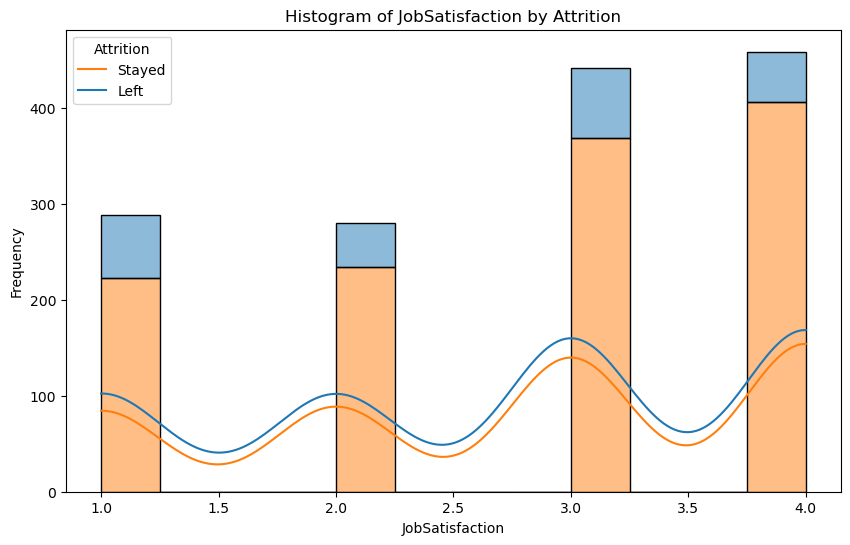

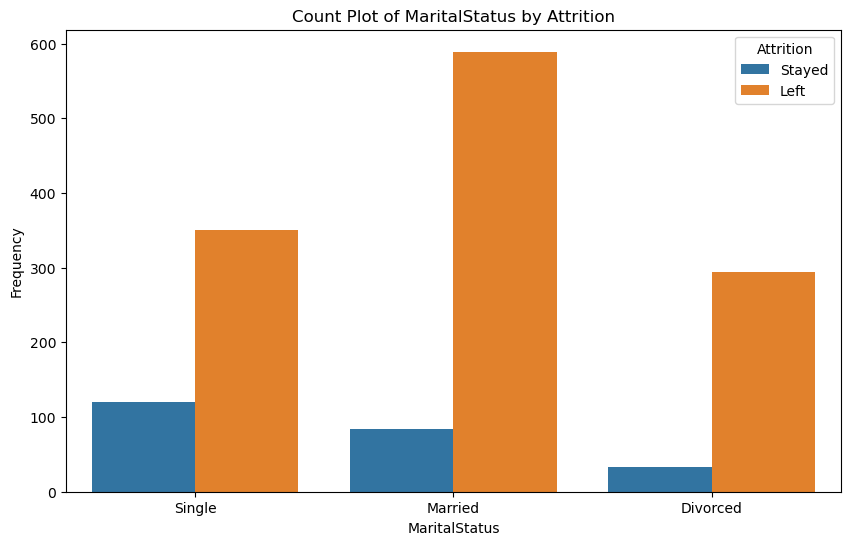

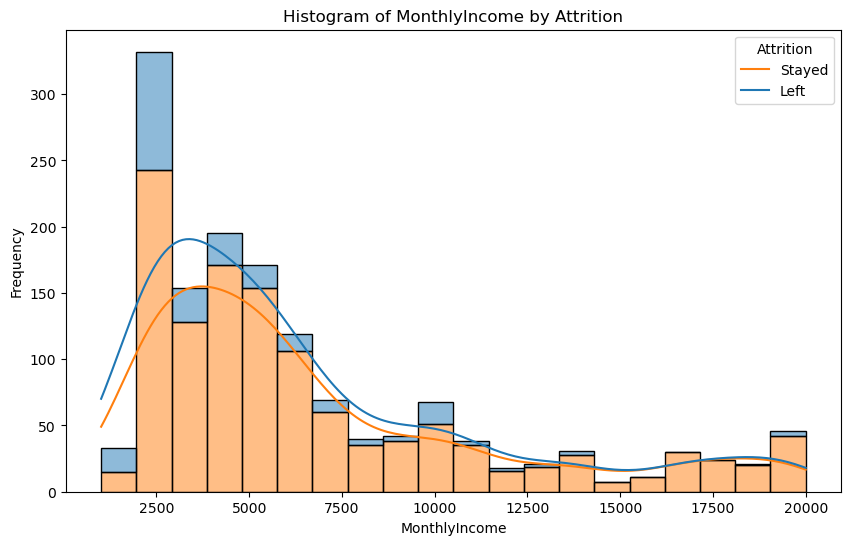

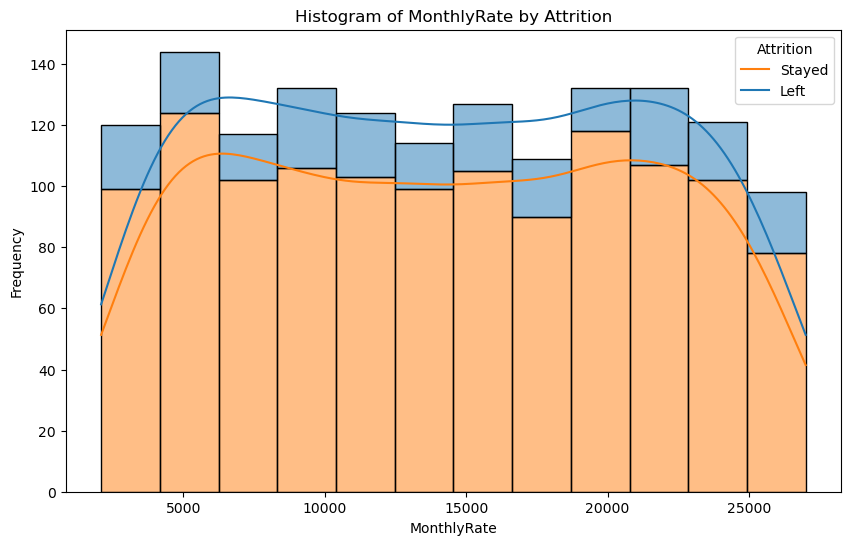

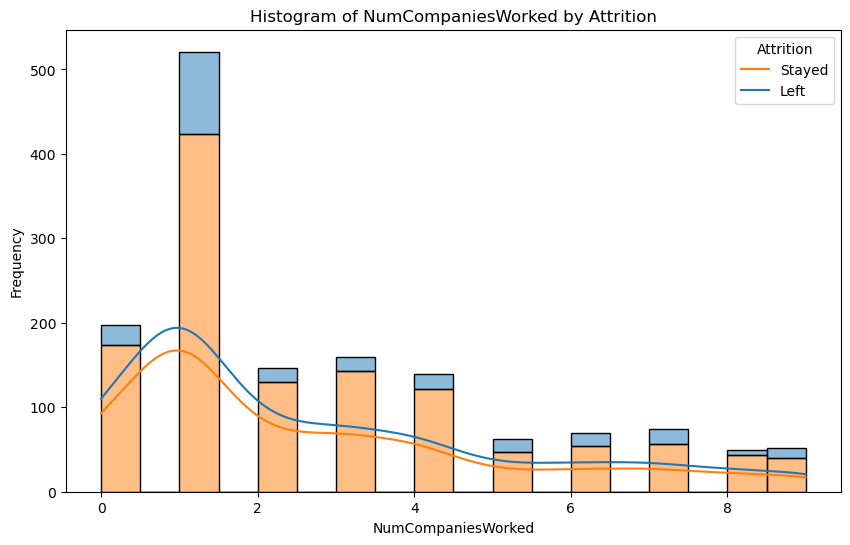

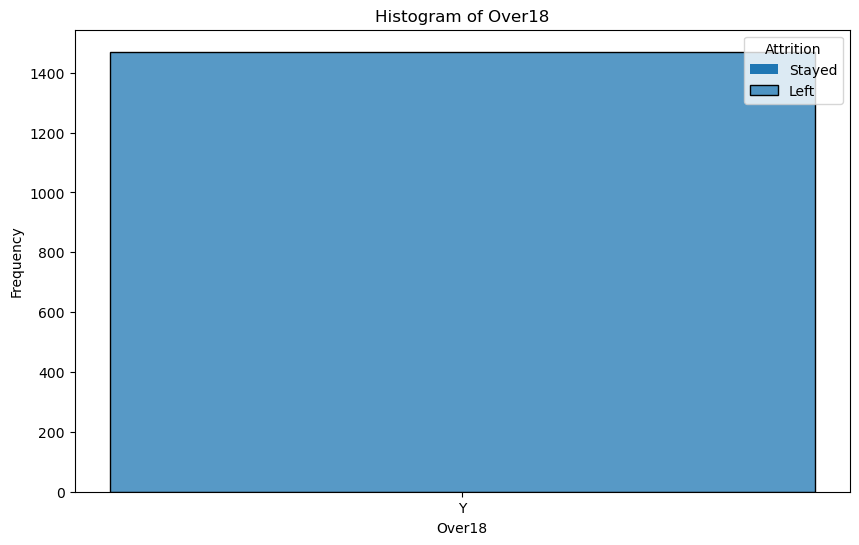

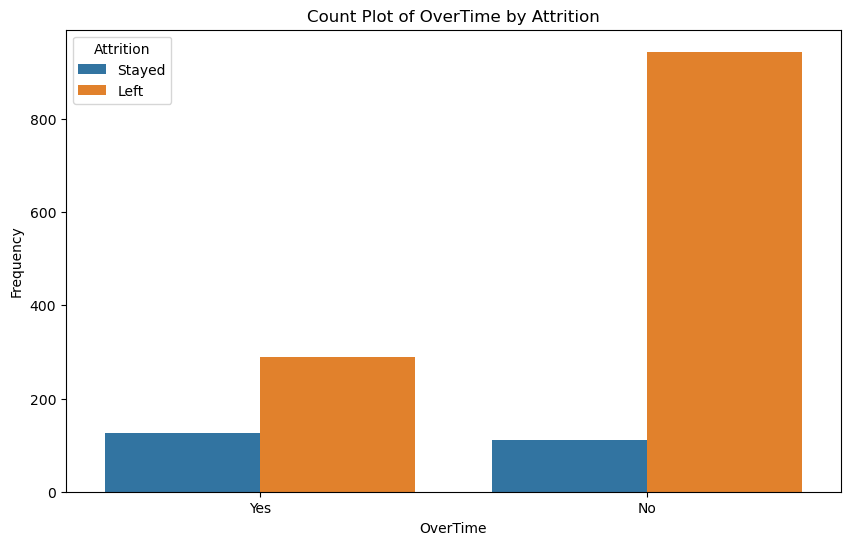

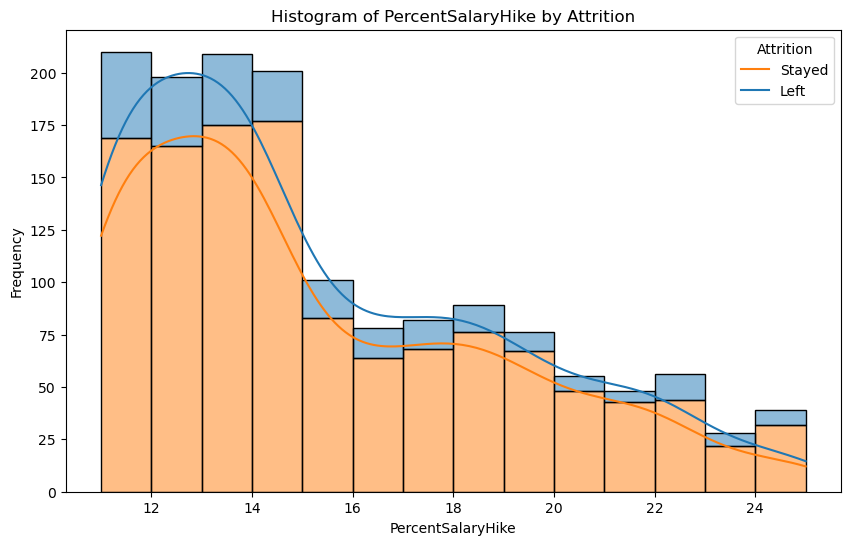

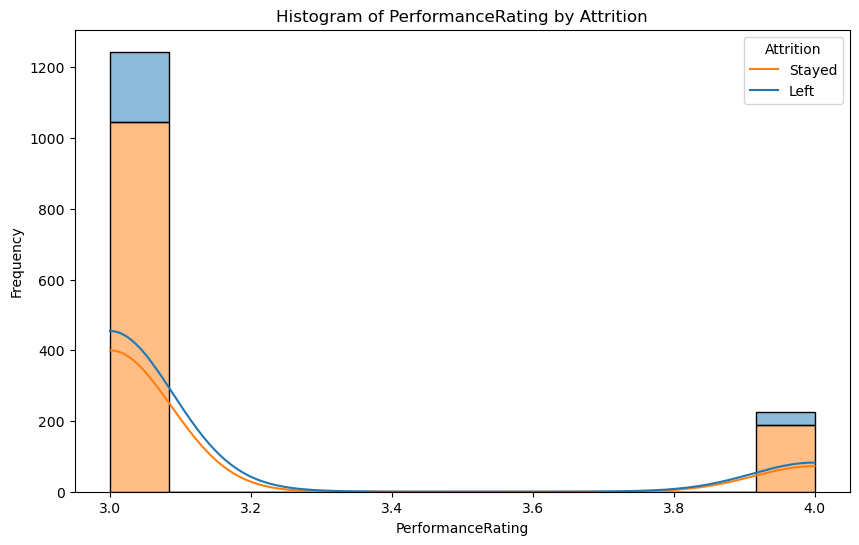

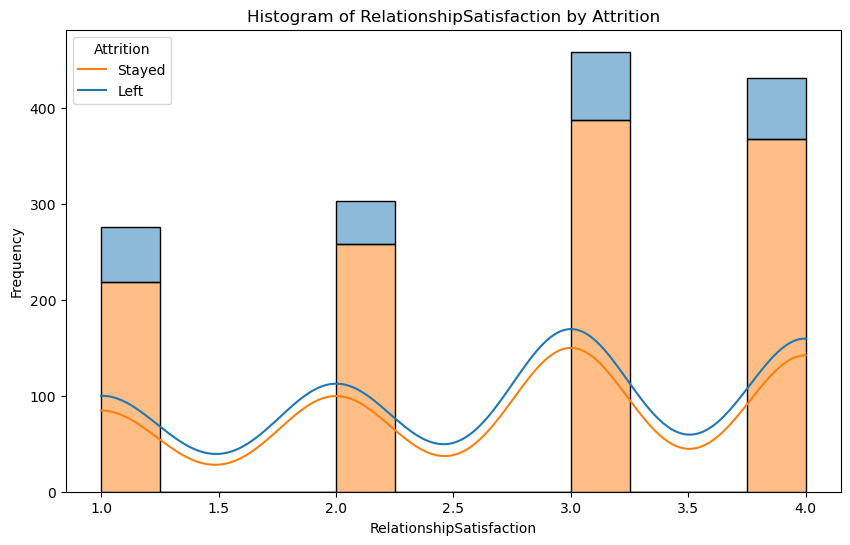

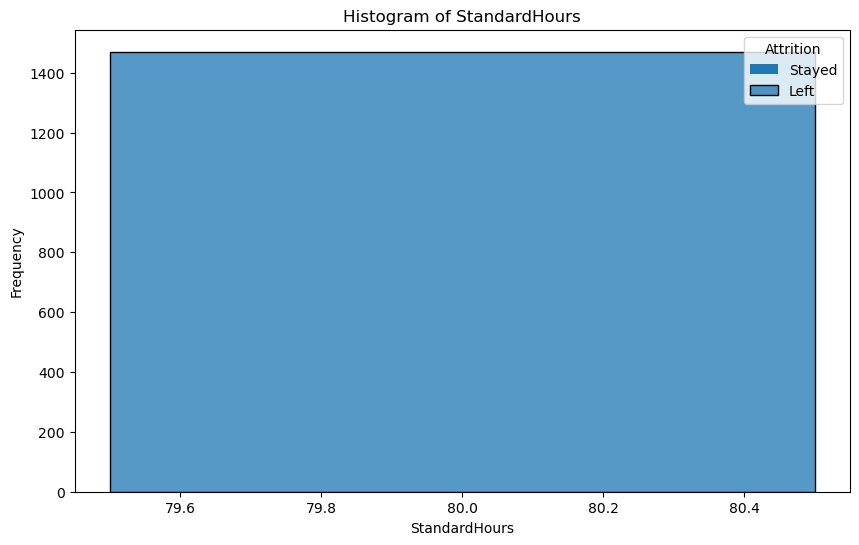

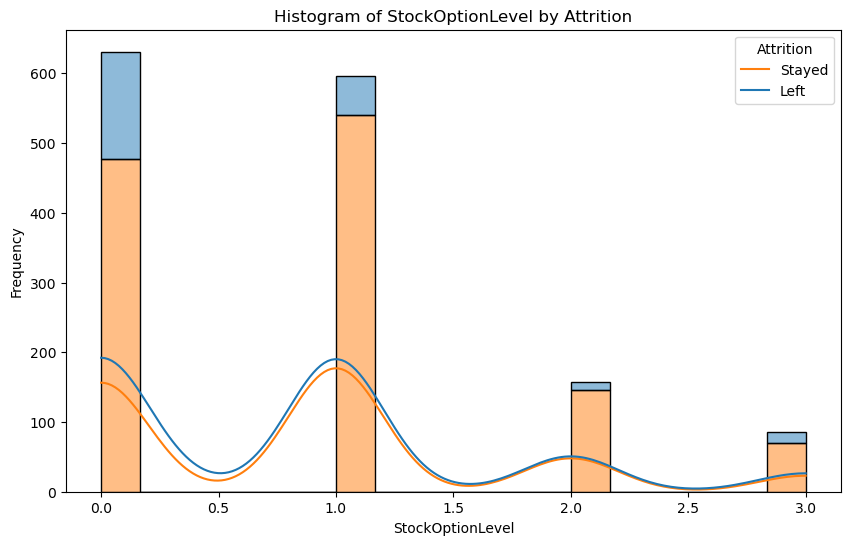

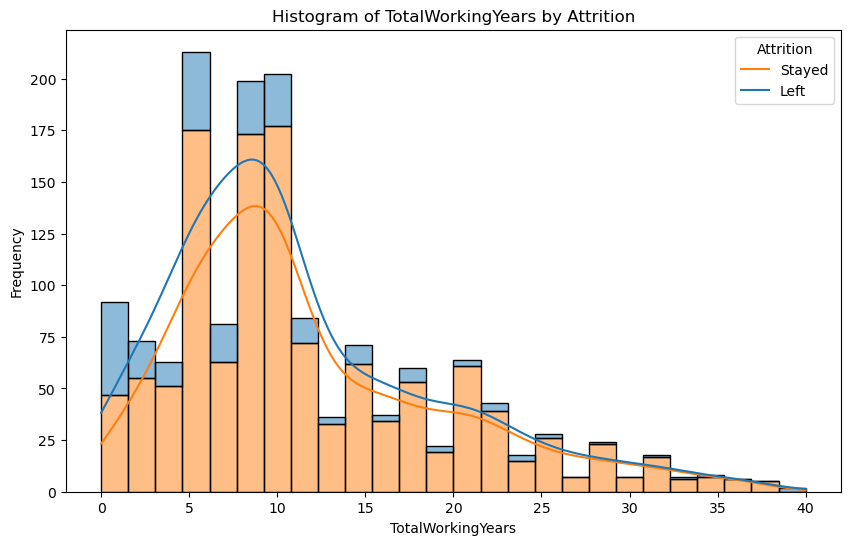

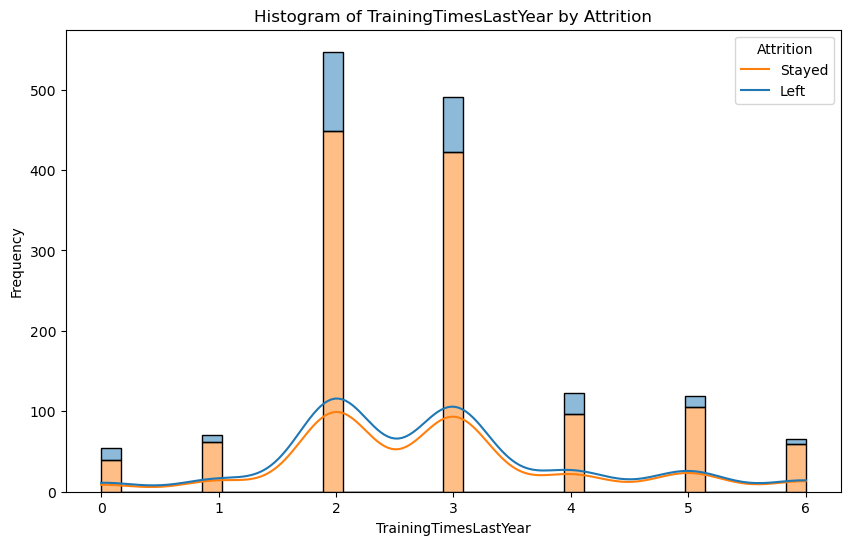

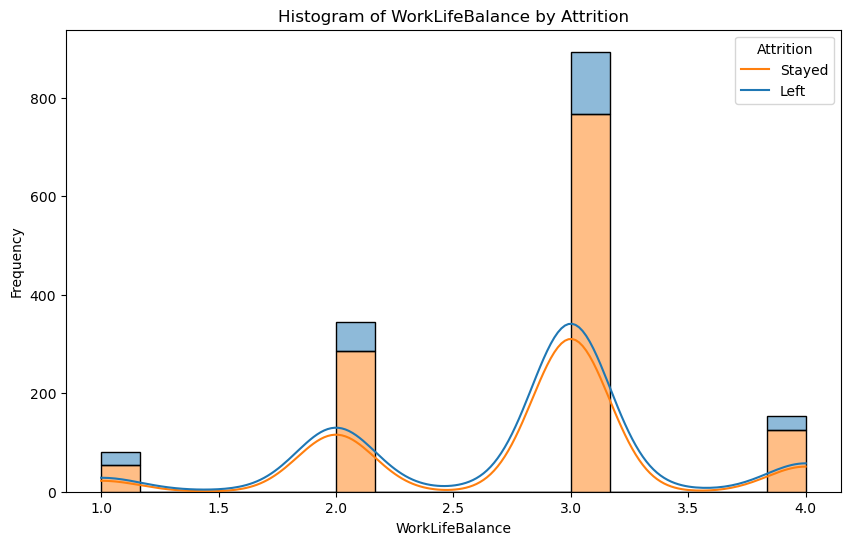

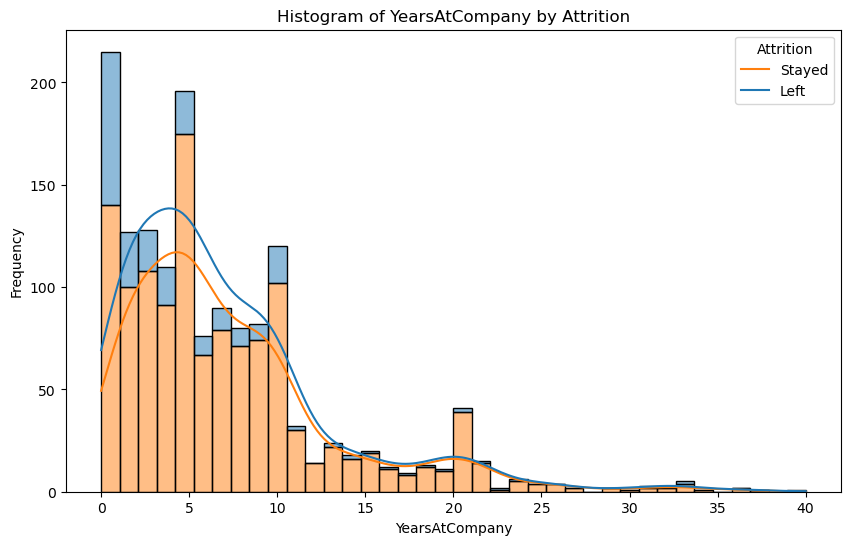

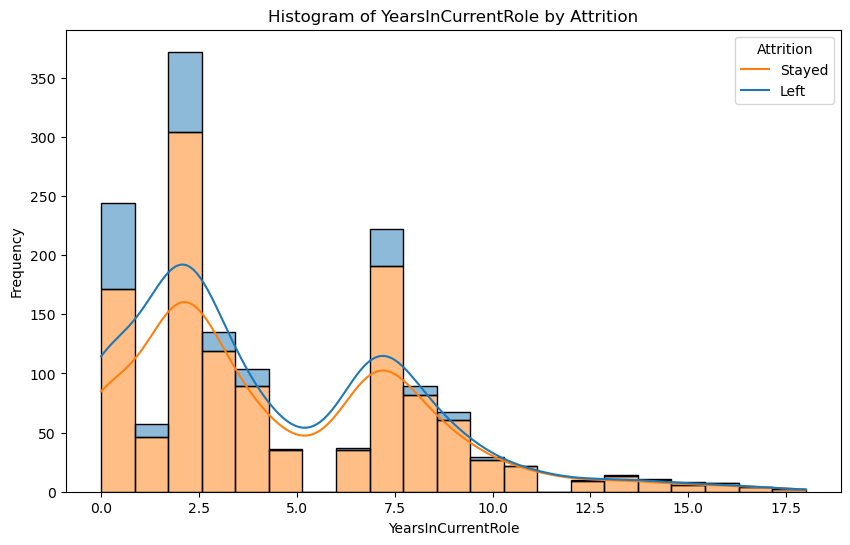

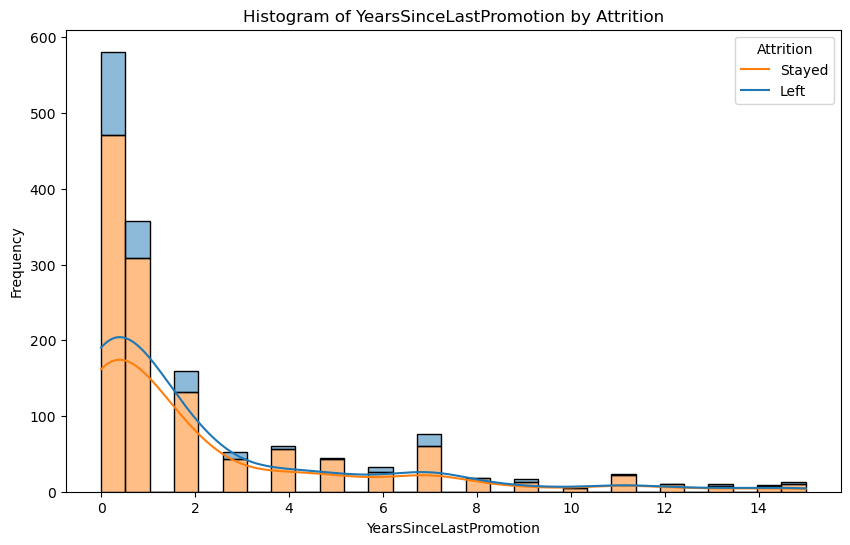

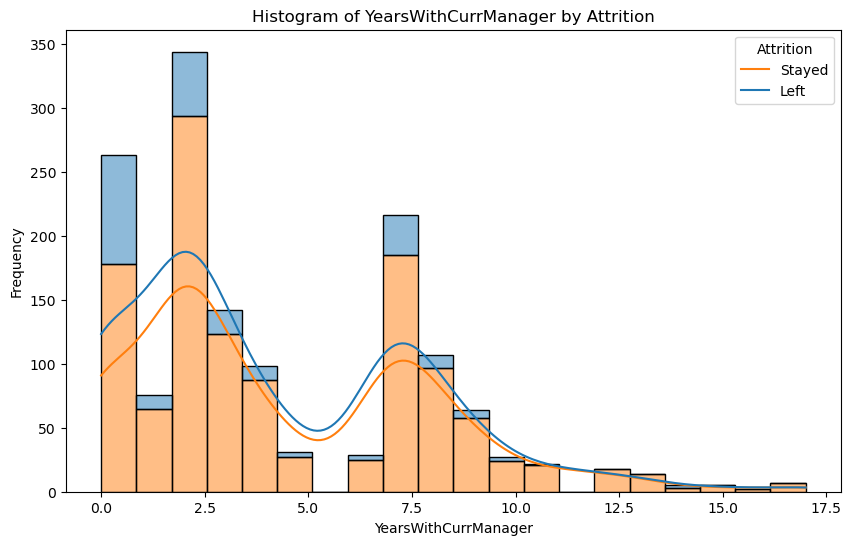

In [314]:
# Function to check for constant columns
def identify_constant_columns(Attrition_df):
    constant_columns = [col for col in Attrition_df.columns if Attrition_df[col].nunique() == 1]
    return constant_columns

# Function to plot histograms for all variables considering Attrition
def plot_histograms_by_attrition(Attrition_df):
    constant_columns = identify_constant_columns(Attrition_df)
    
    for column in Attrition_df.columns:
        if column != 'Attrition':  # Exclude the Attrition column itself
            plt.figure(figsize=(10, 6))
            if column in constant_columns:
                sns.histplot(Attrition_df[column])
                plt.title(f'Histogram of {column}')
            elif Attrition_df[column].dtype == 'object':
                sns.countplot(x=column, hue='Attrition', data=Attrition_df)
                plt.title(f'Count Plot of {column} by Attrition')
            else:
                sns.histplot(data=Attrition_df, x=column, hue='Attrition', multiple='stack', kde=True)
                plt.title(f'Histogram of {column} by Attrition')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.legend(title='Attrition', labels=['Stayed', 'Left'])
            plt.show()

# Plot histograms for all variables in the DataFrame considering Attrition
plot_histograms_by_attrition(Attrition_df)

## Analyzing factors that lead to Employee Attrition

By exploring the charts derived from our dataset on different factors contributing to Employee Attrition, there are reasonable insights for employee attrition which are listed below:
1. Age: More Employees left the company between the age of 28years and 40years
2. Business Travel: Employees that less engaged in the companies business travel left, companies business travel helps employees become more engaged and committed to the companies overal has a way of increase an employee's commitment to the company's success
3. Department: Based on our dataset, their were more people who left the company from the Research and Development department
4. Educational field: This was also an issue, people from the medical and life sciences left, because they were not satisfied with the condition of work.
5. Gender: There where more male's that left the company compared to their female colleagues
6. Job Role: Employee's who left were mostly Sales Executive, Research Scientist, Laboratory Technician and Manufacturing Director 
7. Job satisfaction: Employees who left where averagely spread throughout the percentile, which means everyone has his own personal reason for leaving.
8. Marital status:  From our analysis we can see that there are more married people leaving the company compared to singles and divorced couple
9. Monthly Income: Based on our analysis we can see that employee who earn less are unsatisfied with their salary and tend to leave the company more compared to those who earn bigger salary
10. Monthly rate of Attrition: Attrition happens through all job levels and roles, but it happens on different percentages and from our dataset we calculated the rate of attrition to be 16.12%
11. Overtime by Attrition: We can see that employees who do not involve in overtime jobs get's to leave the company more easier compared to those who did overtime jobs

## Calculate the rate of Employee Attrition
Calculating the rate of employee attrition involves determining the proportion of employees who have left the organization over a specified period relative to the total number of employees. This rate is typically expressed as a percentage.

In [297]:
# Convert Attrition column to numeric
Attrition_df['Attrition'] = Attrition_df['Attrition'].map({'Yes': 1, 'No': 0})

In [299]:
Attrition_df['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [301]:
# Function to calculate the attrition rate
def calculate_attrition_rate(Attrition_df):
    total_employees = len(Attrition_df)
    employees_left = Attrition_df['Attrition'].sum()
    attrition_rate = (employees_left / total_employees) * 100
    return attrition_rate

# Calculate the attrition rate
attrition_rate = calculate_attrition_rate(Attrition_df)
print(f'The employee attrition rate is {attrition_rate:.2f}%')

The employee attrition rate is 16.12%


In [324]:
unique_categories = Attrition_df['JobRole'].unique()

In [326]:
unique_categories

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

## Develop a machine learning model to predict the rate of attrition and give recommendations on how to manage the impact of employee attrition

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [42]:
# Assuming 'Attrition' is the target variable
# Convert categorical 'Attrition' to numeric
Attrition_df['Attrition'] = Attrition_df['Attrition'].map({'Yes': 1, 'No': 0})

In [44]:
Attrition_df['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [46]:

# Select independent variables
features = ['BusinessTravel', 'DistanceFromHome', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
            'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
            'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
            'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
            'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
X = Attrition_df[features]
y = Attrition_df['Attrition']

In [48]:
#Encode Categorical Variables
X = pd.get_dummies(X)

In [50]:
#Split Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
#Train the Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [69]:
#Make Predictions
y_pred = model.predict(X_test)

In [71]:
#Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(cm)
print('Classification Report:')
print(report)


Accuracy: 0.873015873015873
Confusion Matrix:
[[377   3]
 [ 53   8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       380
           1       0.73      0.13      0.22        61

    accuracy                           0.87       441
   macro avg       0.80      0.56      0.58       441
weighted avg       0.86      0.87      0.83       441



In [73]:
#Feature Importance
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print('Feature Importance:')
print(feature_importance_df)

Feature Importance:
                              Feature  Importance
6                       MonthlyIncome    0.099556
14                  TotalWorkingYears    0.066490
7                         MonthlyRate    0.057933
2                          HourlyRate    0.055290
0                    DistanceFromHome    0.054698
17                     YearsAtCompany    0.046682
9                   PercentSalaryHike    0.043686
8                  NumCompaniesWorked    0.041594
37                       OverTime_Yes    0.041469
36                        OverTime_No    0.035913
20               YearsWithCurrManager    0.034823
18                 YearsInCurrentRole    0.034484
13                   StockOptionLevel    0.032921
15              TrainingTimesLastYear    0.032836
1             EnvironmentSatisfaction    0.029787
19            YearsSinceLastPromotion    0.029673
5                     JobSatisfaction    0.029311
4                            JobLevel    0.027658
11           RelationshipSatis

## Recommendations

### Age
- Age-Specific Programs: Develop programs that cater to the needs of different age groups. For younger employees, focus on career development and growth opportunities. For older employees, consider offering flexible work arrangements and retirement planning support.
- Mentorship Programs: Implement mentorship programs where experienced employees mentor younger ones, facilitating knowledge transfer and career development.
### Business Travel
- Travel Benefits: Provide additional benefits for necessary travel, such as travel allowances, flexible scheduling, and additional time off.
### Department
- Department-Specific Strategies: Tailor retention strategies to the unique needs of different departments. For example, provide creative incentives for sales teams, while offering technical training for IT departments.
- Cross-Departmental Training: Encourage cross-departmental training and collaboration to build a more versatile and engaged workforce.
Educational Field
- Relevant Training: Provide continuous education and training that aligns with employees’ educational backgrounds and career aspirations.
- Tuition Reimbursement: Offer tuition reimbursement programs for further education and certifications related to employees’ fields.
### Gender
- Equal Opportunities: Ensure equal opportunities for advancement and pay equity across genders.
- Work-Life Balance: Implement family-friendly policies such as flexible working hours, parental leave, and childcare support.
- Diversity and Inclusion: Promote a diverse and inclusive workplace culture that supports all genders.
### Job Role
- Role Clarity and Advancement: Clearly define job roles and provide clear career advancement paths.
- Role Rotation: Offer job rotation programs to keep employees engaged and help them develop a broad range of skills.
### Job Satisfaction
- Regular Feedback: Conduct regular job satisfaction surveys and take action based on the feedback.
- Recognition and Rewards: Implement recognition and reward programs to acknowledge employees’ hard work and achievements.
- Work Environment: Foster a positive and supportive work environment to enhance job satisfaction.
### Marital Status
- Family Support: Offer family support programs such as spousal employment assistance, flexible work schedules, and parental leave.
- Social Activities: Organize social activities that include families to build a community atmosphere.
### Monthly Income
- Competitive Salaries: Ensure salaries are competitive within the industry and regularly review and adjust compensation.
- Performance Bonuses: Implement performance-based bonuses and incentives to reward high performers.
### Monthly Rate of Attrition
- Identify Patterns: Regularly analyze attrition data to identify patterns and address underlying issues.
- Exit Interviews: Conduct exit interviews to gather insights into why employees are leaving and use this information to improve retention strategies.
### Overtime by Attrition
- Manage Workloads: Ensure workloads are manageable to prevent burnout. Monitor overtime closely and take steps to distribute work evenly.
- Compensate Overtime: Fairly compensate employees for overtime work and consider offering additional time off as compensation.
### Comprehensive Strategy
- Employee Engagement: Focus on engaging employees through meaningful work, recognition, and career development opportunities.
- Flexible Work Arrangements: Offer flexible work arrangements to help employees balance their personal and professional lives.
- Health and Well-being: Promote health and well-being programs, including mental health support, wellness programs, and fitness incentives.
- Career Development: Provide continuous learning opportunities and clear career progression paths to keep employees motivated and invested in their careers.
- Inclusive Culture: Foster a culture of inclusivity and respect where all employees feel valued and included.
### Implementation and Monitoring
- Regular Monitoring: Continuously monitor attrition rates and employee feedback to identify and address issues proactively.
- Data-Driven Decisions: Use data analytics to make informed decisions about retention strategies and track the effectiveness of implemented measures.
- Iterative Improvements: Regularly review and refine retention strategies based on feedback and changing organizational needs.

By implementing these recommendations, organizations can create a more supportive, engaging, and satisfying work environment that significantly reduces employee attrition and enhances overall productivity and success.